<a href="https://colab.research.google.com/github/Melvinmcrn/DataScience/blob/master/Final/Part1_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from scipy.stats import iqr

# Q1

In [17]:
data = pd.read_excel('https://github.com/kaopanboonyuen/Python-Data-Science/raw/master/Dataset/covid-19-daily-o5vw0e/covid-19-daily.xlsx')
data.head(5)

,no,age,sex,nationality,Province of isolation,Notification date,Announce Date,Province of onset,District of onset
0,1,61.0,หญิง,จีน,กทม,NaN,2020-01-12,กทม,NaN
1,2,74.0,หญิง,จีน,กทม,NaN,2020-01-17,กทม,NaN
2,3,73.0,หญิง,จีน,นครปฐม,NaN,2020-01-22,นครปฐม,เมือง
3,4,68.0,ชาย,จีน,กทม,NaN,2020-01-22,กทม,NaN
4,5,66.0,หญิง,จีน,นนทบุรี,NaN,2020-01-24,กทม,NaN


In [0]:
data = data.iloc[100:]

In [19]:
data.head(5)

,no,age,sex,nationality,Province of isolation,Notification date,Announce Date,Province of onset,District of onset
100,101,32.0,ชาย,ไทย,กทม,NaN,2020-03-15,กทม,NaN
101,102,28.0,ชาย,ญี่ปุ่น,กทม,NaN,2020-03-15,กทม,NaN
102,103,41.0,หญิง,ไทย,กทม,NaN,2020-03-15,กทม,NaN
103,104,68.0,ชาย,ไทย,กทม,NaN,2020-03-15,กทม,NaN
104,105,41.0,หญิง,ไทย,กทม,NaN,2020-03-15,กทม,NaN


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 100 to 2764
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   no                     2665 non-null   int64         
 1   age                    2569 non-null   float64       
 2   sex                    2624 non-null   object        
 3   nationality            2591 non-null   object        
 4   Province of isolation  2598 non-null   object        
 5   Notification date      2456 non-null   object        
 6   Announce Date          2665 non-null   datetime64[ns]
 7   Province of onset      2544 non-null   object        
 8   District of onset      1402 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 187.5+ KB


In [21]:
data = data.rename(columns={'nationality': 'NationalityGroup'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 100 to 2764
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   no                     2665 non-null   int64         
 1   age                    2569 non-null   float64       
 2   sex                    2624 non-null   object        
 3   NationalityGroup       2591 non-null   object        
 4   Province of isolation  2598 non-null   object        
 5   Notification date      2456 non-null   object        
 6   Announce Date          2665 non-null   datetime64[ns]
 7   Province of onset      2544 non-null   object        
 8   District of onset      1402 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 187.5+ KB


In [22]:
data['NationalityGroup'].value_counts()

ไทย               2373
ฝรั่งเศส            25
สหราชอาณาจักร       20
พม่า                17
รัสเซีย             12
อเมริกัน            12
ญี่ปุ่น             10
แคนาดา               8
อินเดีย              7
เยอรมัน              7
ไทย                  7
อิตาลี               6
เบลเยียม             6
จีน                  6
สวิตเซอร์แลนด์       5
เดนมาร์ก             5
สวีเดน               5
ฟิลิปปินส์           4
ปากีสถาน             4
ไม่ระบุ              4
สิงคโปร์             4
ออสเตรเลีย           4
เกาหลี               3
อินโดนีเซีย          3
อิสราเอล             2
มาเลเซีย             2
ลาว                  2
คาซัคสถาน            2
สเปน                 2
ไทยใหญ่              1
อิหร่าน              1
Mali                 1
ฮังการี              1
แอลบาเนีย            1
ฟินแลนด์             1
ยูเครน               1
ไลบีเรีย             1
ตูนีเซีย             1
นิวซีแลนด์           1
เซอร์เบีย            1
แอลเบเนีย            1
โปรตุเกส             1
เม็กซิกัน            1
เมียนมาร์  

In [23]:
data['NationalityGroup'] = data['NationalityGroup'].str.strip()
data['NationalityGroup'].value_counts()

ไทย               2380
ฝรั่งเศส            25
สหราชอาณาจักร       20
พม่า                17
รัสเซีย             12
อเมริกัน            12
ญี่ปุ่น             10
แคนาดา               8
อินเดีย              7
เยอรมัน              7
เบลเยียม             6
อิตาลี               6
จีน                  6
สวีเดน               5
สวิตเซอร์แลนด์       5
เดนมาร์ก             5
ปากีสถาน             4
ไม่ระบุ              4
สิงคโปร์             4
ออสเตรเลีย           4
ฟิลิปปินส์           4
เกาหลี               3
อินโดนีเซีย          3
มาเลเซีย             2
อิสราเอล             2
ลาว                  2
สเปน                 2
คาซัคสถาน            2
ไลบีเรีย             1
เม็กซิกัน            1
ตูนีเซีย             1
ยูเครน               1
ฟินแลนด์             1
แอลบาเนีย            1
ฮังการี              1
Mali                 1
อิหร่าน              1
ไม่ทราบ              1
แอลเบเนีย            1
กัมพูชา              1
นิวซีแลนด์           1
อินเดีย-ไทย          1
อุซเบกิสถาน          1
ปาเลสไตน์  

In [29]:
mapping_dictionary = {"NationalityGroup":{ "ไทย": "Thai", "ไม่ทราบ": "N/A", "ไม่ระบุ": "N/A"}}
data = data.replace(mapping_dictionary)
data.loc[(data['NationalityGroup'] != "Thai") & (data['NationalityGroup'] != "N/A"), 'NationalityGroup'] = 'Non-Thai'
data['NationalityGroup'].value_counts()

Thai        2380
Non-Thai     280
N/A            5
Name: NationalityGroup, dtype: int64

# Q2

In [0]:
from scipy.stats import kurtosis, skew

In [33]:
data['age'].describe(include='all')

count    2569.000000
mean       39.381666
std        15.485453
min         0.100000
25%        27.000000
50%        37.000000
75%        50.000000
max        97.000000
Name: age, dtype: float64

In [48]:
print('median=',data['age'].median())

median= 37.0


In [49]:
print('IQR=',data['age'].quantile(0.75) - data['age'].quantile(0.25))

IQR= 23.0


In [52]:
print('kurtosis=',kurtosis(data['age']))
print('skew=',skew(data['age']))

kurtosis= nan
skew= nan


# Q3

In [0]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


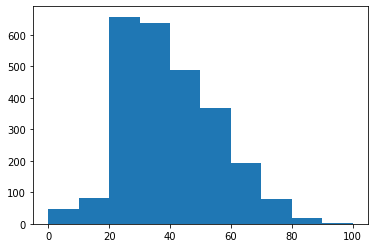

In [55]:
plt.hist(data['age'], bins=10, range=(0, 100))
plt.show()

# Q4

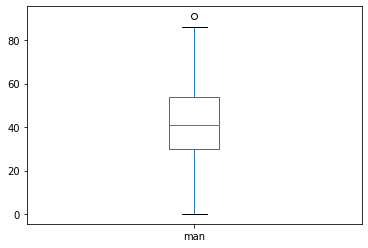

In [96]:
ageman = data.loc[data['sex'] == 'ชาย', 'age'].to_frame()
ageman = ageman.rename(columns={"age":"man"})
ageman.plot(kind= 'box')

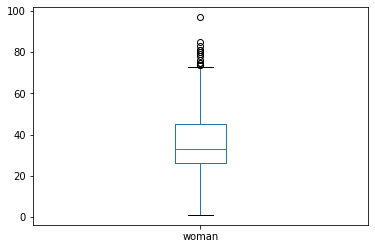

In [97]:
agewoman = data.loc[data['sex'] == 'หญิง', 'age'].to_frame()
agewoman = agewoman.rename(columns={"age":"woman"})
agewoman.plot(kind= 'box')

# Q5

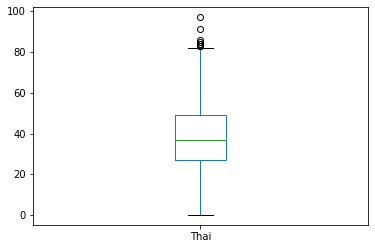

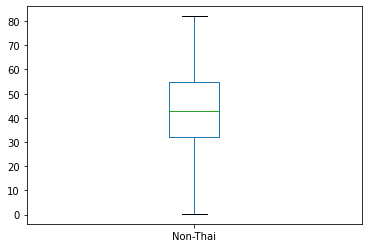

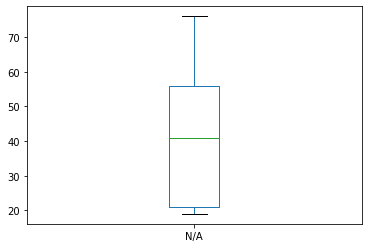

In [106]:
for c in data['NationalityGroup'].value_counts().keys():
  age = data.loc[data['NationalityGroup'] == c, 'age'].to_frame()
  age = age.rename(columns={"age":c})
  age.plot(kind= 'box', layout=(1,3))